# Intro to ML

La práctica de hoy consiste en un simulacro de como empezar un proyecto de analítica / Machine Learning desde el principio.

Cómo hemos comentado en clases anteriores, el primer paso, antes incluso que ponerse a analizar el dataset, es plantearse la estrategía a seguir o como plasmar un problema de negocio en un problema de datos.

Nuestro cliente, una importante hotelera mallorquina (oh, sorpresa). No tiene muy claro que es lo que quiere, simplemente sabe que todo el mundo usa IA actualmente y no quiere quedarse atrás. Hablando con ellos, hemos accedido a hacer una propuesta para ayudarles a entender que valor podrían extraer del análisis de datos / modelización. Por el momento, sabemos que están preocupados por la reputación de sus hoteles y que les interesa saber que motiva que un cliente deje una buena review.

Para tal proposito, disponemos de un dataset con reviews de hoteles en Europa. El dataset se encuentra en la carpeta `data` junto con una descripción de los campos disponibles.

## Trabajo por equipos

#### 1. Revisa el fichero `data_format.txt` para saber que variables tenemos disponibles. A partir de las variables, plantea al menos 3 preguntas que te permitan entender el dataset: por ejemplo:

> Cómo varía la puntuación media de un hotel a lo largo del tiempo ?

1. Vemos que tenemos una variable temporal `review_date` disponible. Plantea cómo podríamos transformar esta variable de forma que pueda aportar valor a la modelizción. Piensa que en un contexto de turismo la estacionalidad es un factor muy importante.

1. Vemos que de todas las variables que tenemos, 3 son texto (2 texto libre y 1 tags). Piensa como vas a tratar esas variables. (Nota: muchas veces nos sabremos de antemano cómo tratar una transformación de un tipo de dato. Usar google es legal.)

1. Vemos que como variable numéricas tenemos la Lat/Long. Cómo podríamos usarla ? Que tipo de nuevas features se podrían calcular a partir de ellas que nos aporten informacion ?

1. Si queremos saber que afecta a una review positiva/negativa, como podríamos reducir el problema de ML supervisado ? Preferímos regresion o clasificacion?



## Trabajo entregable

**Ahora que más o menos tenemos una idea inicial de como tratar el dataset...**

NOTA: el objetivo es ver que sabemos usar los pipelines de sklear. No nos volvamos locos con hacer un trabajo completo.

1. Carga las librerías básicas para el analisis de datos
1. Realiza una limpieza no exhaustiva de los datos
1. Separa los datos en train y test. OJO: no queremos filtrar información! Hay que pensar bien como queremos hacer la separación...
1. Plantea una primera aproximación utilizando un modelo lineal y dibuja una arquitectura de cómo quedaría el `pipeline` de transformación + modelización tipo el mostrado en la clase práctiva de la W5
1. Entrena el modelo y revisa las variables/palabras que son sido más importantes.
1. Cuentale al cliente un mensaje clave sobre que tipo de cosas tienen más en cuenta los clientes: `Si no quieres una mala review no sirvas comida fría`

## Resposta

En aquesta llibreta s'apliquen les conclusions i l'après 
al quadern d'[enginyeria de característiques](10_hr_features_engineering.ipynb) 
que s'ha lliurat de forma conjunta amb aquest. 

Així doncs, alguns dels comentaris faran referència al que ja s'ha informat en 
aquell altre quadern de *Jupyter*.

### 1. Carga las librerías básicas para el analisis de datos

#### Llibreries mínimes per càrrega i anàlisi bàsic de les dades

In [1]:
import numpy as np
import pandas as pd

### 2. Realiza una limpieza no exhaustiva de los datos

#### Carregam les dades

In [2]:
data_file_list = [
    'data/hotel_reviews_dataset_part_1.csv',
    'data/hotel_reviews_dataset_part_2.csv', 
    'data/hotel_reviews_dataset_part_3.csv',
    'data/hotel_reviews_dataset_part_4.csv']

df = pd.DataFrame()

for file in data_file_list:
    print(f"Loading {file}")
    df = pd.concat([df, pd.read_csv(file)], ignore_index = True)

Loading data/hotel_reviews_dataset_part_1.csv
Loading data/hotel_reviews_dataset_part_2.csv
Loading data/hotel_reviews_dataset_part_3.csv
Loading data/hotel_reviews_dataset_part_4.csv


In [3]:
df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


#### Anàlisi estadístic bàsic

In [4]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


Crida l'atenció que la latitud i la longitud tenguin un recorregut tan petit. 
Però com ja sabem pel treball fet al quadern anterior, 
això és degut a que els hotels són només de 6 ciutats diferents. 

#### Tractament dels valors *nan*

A mode de recordatori del vist al quadern d'enginyeria de característiques, 
miram (per segon cop) si tenim valors *nan* a qualque columna ...

In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

Pel que fa **als valors nuls** a les coordenades geogràfiques
(camps `lat` i `lng`) d'alguns registres podriem escollir entre: 
- completar el nostre *data set* des de fonts externes, informant els nuls per inferència de les seves coordenades aproximades a partir del país i ciutat o l'adreça completa
- suprimir els registres sense coordenades informades

> Com ja s'ha vist al quadern d'[enginyeria de característiques](10_hr_features_engineering.ipynb#Valors_nuls), el percentatge d'afectació pel que fa als registres és inferior al 0.7%. 
>
> Degut a aquesta escasa afectació, pensam que tenim dues possibilitats: 1) en el cas d'haver d'utilitzar la latitud i longitud com a característiques, **optariem per la supresió dels registres amb nuls**, doncs el més probable és que no valgui la pena l'esforç per completar-les i a més, part de la informació que aportaria la latitud, ja està capturada per la nova característica `hotel_country` vista al quadern d'enginyeria de característiques; 2) si no calés utilitzar les característiques de latitud i longitud, **optariem per utilitzar tot el conjunt de dades** subministrat.

#### Estudi de les característiques predictores i creació de noves

Com ja s'ha dit a l'inici de la [resposta](#Resposta), 
per tal de mantenir aquest *notebook* compacte, 
s'ha optat per fer l'estudi de les característiques en 
el quadern [10_hr_features_engineering.ipynb](10_hr_features_engineering.ipynb) 
que es subministra conjuntament amb aquest.

Per a fer aquesta primera aproximació lineal 
que se'ns demana, optam per a no fer servir 
les característiques de latitud i longitud. 

A mode de recordatori i referència s'inclou la seguent taula resum:

##### Taula 1: resum de la codificació de les característiques

| Columna       | Característica        | Explicació |
| --- | --- | --- |
| Hotel_Address | hotel_id              | Cream un valor de hash únic per a cada establiment. L'utilitzarem per a dividir el conjunt de forma consistent |
| Ídem          | h_country1..5      | Extreim el nom del país de `Hotel_Address` i aplicam *OHE*. Esperam que sigui moderadament explicativa |
| Average_Score | average_score         | És el valor escalat de la columna. Esperam que sigui àltament explicativa |
| Hotel_Name    | Contribueix a hotel_id  | Tot i que el nom de l'hotel podria influenciar a un percentage petit dels hostes, pensam que no val la pena fer-la servir, excepte per a la generació del hash `hotel_id` |
| Total_Number_of_Reviews | hotel_tnreviews  | Conté el valor escalat de la columna. Pensam que un número gran d'opinions pot indicar que l'establiment necessita millorar |
| Additional_Number_of_Scoring | No utilitzada | Pensam que serà molt menys explicativa que `hotel_tnreviewes` i la ignoram. |
| lat      | No utilitzada | Part de la seva informació la capturam amb el país de l'adreça (`hotel_countryN`) |
| lng      | No utilitzada | Ídem |
| Review_Date | rd_2q..4q    | Aquestes variables *dummy* codifiquen el trimestre de l'any en que es grava la valoració. |
| Reviewer_Nationality | rvr_country0..9 | Generam aquestes 10 variables *dummy* aplicant *OHE* als 10 països més freqüents amb l'esperança de que aporti una certa informació respecte de la forma de pensar i valorar de cada nacionalitat. |
| Negative_Review |  | El texte de l'opinió serà valorat un cop entrenat el model |
| Review_Total_Negative_Word_Counts | rv_negwcount | Una opinió negativa més llarga segurament està inversament relacionada amb la nota |
| Positive_Review |  | No utilitzat perquè només ens demanen que ens fixem en el que cal millorar |
| Review_Total_Positive_Word_Counts | rv_poswcount | Una opinió positiva més llarga pot estar (o no) directament relacionada amb una nota més alta |
| Reviewer_Score | y | Formarà el vector de valors a predir |
| Total_Number_of_Reviews_Reviewer_Has_Given | rvr_tnreviews | Pensam que si té experiència en opinar, les opinions seran més extenses a l'hora d'enumerar les falles o les lloances i que la nota molts cops serà proporcional a l'extensió. |
| Tags | Veure taula 2 |  |
| days_since_review | No utilitzada | Pensam que aquesta característica aportarà poca informació o senzillament renou. |

On:
- Columna: nom de la columna original al *data set* subministrat
- Característica: nom de la característica al *data set* processat pel *pipeline*
- Explicació: comentari aclaridor

##### Taula 2: codificació de la característica `Tags`

| Semàntica          | Variable *dummy*     | Val 1 només si existeix l'etiqueta |
| --- | --- | --- |
| tipologia de l'hoste | `gt_fam_old_child`   | `Family with older children` |
| ídem               | `gt_fam_young_child` | `Family with young children` |
| ídem               | `gt_group`           | `Group` |
| ídem               | `gt_solo`            | `Solo traveler` |
| ídem               | `gt_couple`          | `Couple` |
| tipus de viatge    | `tt_business`        | `Business trip` |
| ídem               | `tt_leisure`         | `Leisure trip` |
| durada de l'estada | `stayed_1`           | `Stayed 1 night` |
| ídem               | `stayed_2`           | `Stayed 2 nights` |
| ídem               | `stayed_3`           | `Stayed 3 nights` |
| ídem               | `stayed_4`           | `Stayed 4 nights` |

#### Preparació de la nostra l'arquitectura de *pipelines* 

Seguirem aquestes passes:

##### 1. Definir les classes necessàries

Rescatam les classes SelectColumns i DropColumns del notebook `W5/ 5 - Intro to ML.ipynb`
i afegim les noves que necessitam 
per tractar cada una de transformacions de variables categòriques.

In [6]:
from sklearn.base import TransformerMixin

### aux functions

class SelectColumns(TransformerMixin):
    def __init__(self, columns: list) -> pd.DataFrame:
        if not isinstance(columns, list):
            raise ValueError('Specount the columns into a list')
        self.columns = columns
    def fit(self, X, y=None): # we do not need to specify the target in the transformer. We leave it as optional arg for consistency
        return self
    def transform(self, X):
        return X[self.columns]
    
class DropColumns(TransformerMixin):
    def __init__(self, columns: list) -> pd.DataFrame:
        if not isinstance(columns, list):
            raise ValueError('Specify the columns into a list')
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(self.columns, axis=1)

També afegirem una nova classe amb la qual 
podrem **extreure les dades numériques** 
de columnes amb números, seguides d'unitats, 
com per exemple la `days_since_review` 
si al final decidíssim fer-la servir 
(de moment no la consideram interessant).

In [7]:
class Extract2Num(TransformerMixin):
    def __init__(self, columns: list) -> pd.DataFrame:
        if not isinstance(columns, list):
            raise ValueError('Specify the columns into a list')
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        _X = pd.DataFrame()
        for column in self.columns: 
            _X[column] = X[column].str.extract(r'(\d+)')
        return X.drop(self.columns, axis = 1).join(_X)

La següent **genera un valor hash** a partir d'una tupla 
especificada per `columns`:

In [8]:
import pandas as pd

# afegim el paràmetre rsuffix
# per evitar errors per mor de col·lisions al join final

class HashThis(TransformerMixin):
    def __init__(self, columns: list, 
                 mod: int,
                 new_col: str) -> pd.DataFrame:
        if not isinstance(columns, list):
            raise ValueError('Specify the columns into a list')
        if not isinstance(new_col, str):
            raise ValueError('Specify the new column as str')
        self.columns = columns
        self.mod = mod
        self.new_col = new_col
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        hashes = []
        for t in X[self.columns].itertuples(index = False, name = None):
            hashes.append(hash(str(t)) % self.mod)
        return X.join(
            pd.DataFrame(
                hashes, 
                columns = [self.new_col]).set_index(X.index)
            )

La següent 
**codifica el nom del país en forma de variables dummy**. 
Li passam la columna amb l'adreça a explorar, 
la llista de països i un suffixe per evitar col·lisions 
en fer el *join* amb el *data frame* original:

In [9]:
import pandas as pd

class DummyCountryEnds(TransformerMixin):
    def _zero_1(self, length: int, one_pos: int) -> list:
        """
        Return zero'ed vector of length, except at one_pos
        """
        v = [0] * length
        v[one_pos] = 1
        return v
    
    def __init__(self, column: str, 
                 country_list: list,
                 prefix: str
                ) -> pd.DataFrame:
        if not isinstance(column, str):
            raise ValueError('Specify the column as str')
        if not isinstance(country_list, list):
            raise ValueError('Specify the country_list as a list')
        if not isinstance(prefix, str):
            raise ValueError('Specify the columns name prefix as str')
        self.column = column
        self.country_list = country_list
        self.prefix = prefix
        self.list_len = len(country_list)
        # construir llista de noms de columna
        self.columns = list(prefix + str(i) for i in range(self.list_len))
        # construir diccionari de dummys
        self.country_dict = {
            country_list[i]: self._zero_1(self.list_len, i) 
            for i in range(0, self.list_len)}
        self.country_dict['None'] = [0] * self.list_len
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        country_dummy = []
        for address in X[self.column]:
            country_name = 'None'
            i = 0
            while (country_name == 'None') and (i < self.list_len):
                if address.endswith(self.country_list[i]):
                    country_name = self.country_list[i]
                i += 1
            country_dummy.append(self.country_dict[country_name])
        return X.join(
            pd.DataFrame(
                country_dummy, 
                columns = self.columns).set_index(X.index)
            )

La proper també 
**codifica el nom del país en forma de variables dummy**, 
però ho fa comparant tota la variable. 
Li passam la columna amb la'dreça a explorar, 
la llista de països i un suffixe per evitar col·lisions 
en fer el *join* amb el *data frame* original:

In [10]:
import pandas as pd

class DummyCountryIs(TransformerMixin):
    def _zero_1(self, length: int, one_pos: int) -> list:
        """
        Return zero'ed vector of length, except at one_pos
        """
        v = [0] * length
        v[one_pos] = 1
        return v
    
    def __init__(self, column: str, 
                 country_list: list,
                 prefix: str
                ) -> pd.DataFrame:
        if not isinstance(column, str):
            raise ValueError('Specify the column as str')
        if not isinstance(country_list, list):
            raise ValueError('Specify the country_list as a list')
        if not isinstance(prefix, str):
            raise ValueError('Specify the columns name prefix as str')
        self.column = column
        self.country_list = country_list
        self.prefix = prefix
        self.list_len = len(country_list)
        # construir llista de noms de columna
        self.columns = list(prefix + str(i) for i in range(self.list_len))
        # construir diccionari de dummys
        self.country_dict = {
            country_list[i]: self._zero_1(self.list_len, i) 
            for i in range(0, self.list_len)}
        self.country_dict['None'] = [0] * self.list_len
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        country_dummy = []
        for country in X[self.column]:
            country_name = 'None'
            i = 0
            while (country_name == 'None') and (i < self.list_len):
                if country.strip() == self.country_list[i]:
                    country_name = self.country_list[i]
                i += 1
            country_dummy.append(self.country_dict[country_name])
        return X.join(
            pd.DataFrame(
                country_dummy, 
                columns = self.columns).set_index(X.index)
            )

Amb la que segueix, cream les **variables *dummy* del trimestre** 
de la data de la gravació.

In [11]:
import pandas as pd
from datetime import datetime

class DummyDateQuarter(TransformerMixin):
    def _zero_1(self, length: int, one_pos: int) -> list:
        """
        Return zero'ed vector of length, except at one_pos
        """
        v = [0] * length
        v[one_pos] = 1
        return v
    
    def __init__(self, column: str, 
                 dformat: str, 
                 prefix: str
                ) -> pd.DataFrame:
        if not isinstance(column, str):
            raise ValueError('Specify the column as str')
        if not isinstance(dformat, str):
            raise ValueError('Specify the date format as datetime format string')
        if not isinstance(prefix, str):
            raise ValueError('Specify the columns name prefix as str')
        self.column = column
        self.dformat = dformat
        self.prefix = prefix
        # construir llista de noms de columna
        self.columns = list(prefix + str(i) for i in range(4))
        # construir diccionari de dummys
        self.month_dict = {
            i + 1: self._zero_1(4, i // 3) 
            for i in range(12)}
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        quarter_dummy = []
        for date in X[self.column]:
            quarter_dummy.append(
                self.month_dict[
                    datetime.strptime(date, self.dformat).month
                    ]
                )
        return X.join(
            pd.DataFrame(
                quarter_dummy, 
                columns = self.columns).set_index(X.index)
            )

I finalment **processam les etiquetes**, convertint-les en variables *dummy*.

In [12]:
import pandas as pd
from ast import literal_eval

class DummyTags(TransformerMixin):    
    def __init__(self, column: str, 
                 tags_list: list,
                 prefix: str
                ) -> pd.DataFrame:
        if not isinstance(column, str):
            raise ValueError('Specify the column as str')
        if not isinstance(tags_list, list):
            raise ValueError('Specify the country_list as a list')
        if not isinstance(prefix, str):
            raise ValueError('Specify the columns name prefix as str')
        self.column = column
        self.tags_list = tags_list
        self.prefix = prefix
        self.list_len = len(tags_list)
        # construir llista de noms de columna
        self.columns = list(prefix + str(i) for i in range(self.list_len))
        self.zeros = [0] * self.list_len
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        tags_dummy = []
        for tags in X[self.column]:
            tags = literal_eval(tags)
            dummies = [0] * self.list_len
            for i in range(self.list_len):
                if self.tags_list[i] in tags:
                    dummies[i] = 1
            tags_dummy.append(dummies)
        return X.join(
            pd.DataFrame(
                tags_dummy, 
                columns = self.columns).set_index(X.index)
            )

##### 2. Segregar les columnes per itineraris

Separarem les columnes en quatre classes:
- les numèriques que necessiten netejar valors *nan* i després ésser escalades
- les categòriques, que requereixen d'una transformació (per exemple, codificar per mitjà de variables *dummy*)
- les que cal suprimir al final del procés de transformació i abans d'aplicar-les al model
- el valor que volem predir

In [13]:
from sklearn.pipeline import Pipeline

In [14]:
num_cols_list = [
    'Average_Score',
    'Total_Number_of_Reviews',
    'Review_Total_Negative_Word_Counts',
    'Review_Total_Positive_Word_Counts',
    'Total_Number_of_Reviews_Reviewer_Has_Given',
    'Reviewer_Score']

cat_cols_list = [
    'Hotel_Address', 
    'Hotel_Name',
    'Review_Date',
    'Reviewer_Nationality',
    'Tags']

# eliminam també una columna del país de l'hotel 
# i una del trimestre per evitar colinealitats
drop_cat_cols_list = [
    'Hotel_Address',
    'Hotel_Name',
    'Review_Date',
    'Reviewer_Nationality',
    'Tags',
    'hc0', # primera columna del país (OHE)
    'rd_q0' # primera columna del trimestre
    ]

Itinerari columnes numèriques:

In [15]:
from sklearn.preprocessing import MinMaxScaler

sel_num_col_step = ('sel_num_col', 
                    SelectColumns(num_cols_list)
                   )

scaler_step = ('scaler', 
               MinMaxScaler()
              )

num_pipe_steps = [sel_num_col_step, scaler_step]

num_pipe = Pipeline(num_pipe_steps)

Itinerari columnes categòriques:

In [67]:
# Columnes per a la generació del codi únic d'establiment hoteler
hotel_id_cols = ['Hotel_Address', 'Hotel_Name']
hash_mod = 1e7 - 1
hotel_id = 'hotel_id'

# Extracció del país des de l'adreça de l'hotel
hotel_address_col = 'Hotel_Address'
hotel_country_list = ['Austria',
                      'France', 
                      'Italy',
                      'Netherlands', 
                      'Spain', 
                      'United Kingdom']

# Extracció del trimestre
rv_date_col = 'Review_Date'
rv_date_format = '%m/%d/%Y'

# Llista de les 10 nacionalitats més freqüents
rvr_country_col = 'Reviewer_Nationality'
rvr_country_list = ['Australia',
                    'Canada', 
                    'Germany', 
                    'Ireland',
                    'Netherlands', 
                    'Saudi Arabia', 
                    'Switzerland', 
                    'United Arab Emirates',
                    'United Kingdom',
                    'United States of America']

# Extracció des d'etiquetes
rv_tags_col = 'Tags'
rv_tags_list = [' Family with older children ',
                ' Family with young children ',
                ' Group ',
                ' Solo traveler ',
                ' Couple ',
                ' Business trip ',
                ' Leisure trip ',
                ' Stayed 1 night ',
                ' Stayed 2 nights ',
                ' Stayed 3 nights ',
                ' Stayed 4 nights ']

# Que volem predir?

src_target_col = 'Reviewer_Score'
target_col = 'y'

In [17]:
# farem servir OneHotEncoder a mida per tal de garantir 
# que els camps dummy sempre facin referència al mateix

sel_cat_col_step = ('sel_cat_col', 
                    SelectColumns(cat_cols_list)
                   )

hotel_id_step = ('hotel_id', 
                 HashThis(columns = hotel_id_cols, 
                          mod = hash_mod,
                          new_col = 'hotel_id')
                )

hotel_country_step = ('hotel_country', 
                      DummyCountryEnds(column = hotel_address_col, 
                                       country_list = hotel_country_list,
                                       prefix = 'hc')
                     )

rv_date_step = ('rd_q',
                DummyDateQuarter(column = rv_date_col, 
                                 dformat = rv_date_format,
                                 prefix = 'rd_q')
               )

rvr_country_step = ('rvr_country', 
                    DummyCountryIs(column = rvr_country_col, 
                                   country_list = rvr_country_list,
                                   prefix = 'rc')
                   )

rv_tags_step = ('rv_tags', 
                    DummyTags(column = rv_tags_col, 
                              tags_list = rv_tags_list,
                              prefix = 'tag')
                   )

drop_cat_col_step = ('drop_cat_col', DropColumns(drop_cat_cols_list))

cat_pipe_steps = [sel_cat_col_step,
                  hotel_id_step,
                  hotel_country_step,
                  rv_date_step,
                  rvr_country_step, 
                  rv_tags_step,
                  drop_cat_col_step]

cat_pipe = Pipeline(cat_pipe_steps)

Després les tornam a unir per a obtenir les tuples a processar

In [18]:
from sklearn.pipeline import FeatureUnion

transformer_list = [('cat_pipe', cat_pipe),
                    ('num_pipe', num_pipe)]

### Juntam els dos itineraris 

data_prep_pipe = FeatureUnion(transformer_list=transformer_list)

data_prep_step = ('data_prep', data_prep_pipe)

In [83]:
out_cols = [hotel_id,
#            'h_country0', # colinealitat
            'h_country1', 'h_country2', 
            'h_country3', 'h_country4', 'h_country5',
#            'rd_1q', # colinealitat
            'rd_2q', 'rd_3q', 'rd_4q',
            'rvr_country0', 'rvr_country1', 
            'rvr_country2', 'rvr_country3', 
            'rvr_country4', 'rvr_country5', 
            'rvr_country6', 'rvr_country7', 
            'rvr_country8', 'rvr_country9', 
            'gt_fam_old_child', 'gt_fam_young_child',
            'gt_group', 'gt_solo', 'gt_couple',      
            'tt_business', 'tt_leisure',
            'stayed_1', 'stayed_2', 'stayed_3', 'stayed_4',
            'average_score', 
            'hotel_tnreviews', 
            'rv_negwcount', 
            'rv_poswcount', 
            'rvr_tnreviews',
            'y']

#### Prova del pipeline

Provam a veure que tal ha quedat:

In [20]:
main_pipe = Pipeline([data_prep_step])

In [21]:
X_pipe = pd.DataFrame(
    main_pipe.fit_transform(df), columns = out_cols)

In [22]:
X_pipe.describe()

,hotel_id,h_country1,h_country2,h_country3,h_country4,h_country5,rd_2q,rd_3q,rd_4q,rvr_country0,...,stayed_1,stayed_2,stayed_3,stayed_4,average_score,hotel_tnreviews,rv_negwcount,rv_poswcount,rvr_tnreviews,y
count,5.157380e+05,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,...,515738.000000,515738.00000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,5.056472e+06,0.116199,0.072143,0.110936,0.116627,0.508594,0.256465,0.276144,0.231552,0.042048,...,0.375472,0.25970,0.185794,0.092716,0.695106,0.162431,0.045440,0.045004,0.017418,0.786010
std,2.789716e+06,0.320463,0.258725,0.314053,0.320976,0.499927,0.436682,0.447089,0.421824,0.200700,...,0.484245,0.43847,0.388941,0.290034,0.119141,0.139380,0.072772,0.055200,0.031187,0.218381
min,3.830000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.858406e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.630435,0.067240,0.004902,0.012658,0.000000,0.666667
50%,5.065265e+06,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.695652,0.125759,0.022059,0.027848,0.005650,0.840000
75%,7.330856e+06,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.00000,0.000000,0.000000,0.782609,0.214711,0.056373,0.055696,0.019774,0.946667
max,9.990577e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Comprovem si hi ha qualque NaN:

In [23]:
X_pipe.isnull().values.any()

False

I el conjunt de valors

In [24]:
X_pipe.nunique()

hotel_id              1494
h_country1               2
h_country2               2
h_country3               2
h_country4               2
h_country5               2
rd_2q                    2
rd_3q                    2
rd_4q                    2
rvr_country0             2
rvr_country1             2
rvr_country2             2
rvr_country3             2
rvr_country4             2
rvr_country5             2
rvr_country6             2
rvr_country7             2
rvr_country8             2
rvr_country9             2
gt_fam_old_child         2
gt_fam_young_child       2
gt_group                 2
gt_solo                  2
gt_couple                2
tt_business              2
tt_leisure               2
stayed_1                 2
stayed_2                 2
stayed_3                 2
stayed_4                 2
average_score           34
hotel_tnreviews       1142
rv_negwcount           402
rv_poswcount           365
rvr_tnreviews          198
y                       37
dtype: int64

Amb el rang de *hash* que hem fixat seguim tenguent els 1494 establiments, per tant no hi ha col·lisions.

Inspeccionem breument les columnes:

In [25]:
X_pipe.iloc[:, :9]

,hotel_id,h_country1,h_country2,h_country3,h_country4,h_country5,rd_2q,rd_3q,rd_4q
0,2071996.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2071996.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2071996.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2071996.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2071996.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
515733,1883384.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
515734,1883384.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
515735,1883384.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
515736,1883384.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
X_pipe.iloc[:, 9:19]

,rvr_country0,rvr_country1,rvr_country2,rvr_country3,rvr_country4,rvr_country5,rvr_country6,rvr_country7,rvr_country8,rvr_country9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
515733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X_pipe.iloc[:, 19:30]

,gt_fam_old_child,gt_fam_young_child,gt_group,gt_solo,gt_couple,tt_business,tt_leisure,stayed_1,stayed_2,stayed_3,stayed_4
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
515733,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
515734,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
515735,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
515736,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [28]:
X_pipe.iloc[:, 30:]

,average_score,hotel_tnreviews,rv_negwcount,rv_poswcount,rvr_tnreviews,y
0,0.543478,0.081795,0.973039,0.027848,0.016949,0.053333
1,0.543478,0.081795,0.000000,0.265823,0.016949,0.666667
2,0.543478,0.081795,0.102941,0.053165,0.022599,0.613333
3,0.543478,0.081795,0.514706,0.065823,0.000000,0.173333
4,0.543478,0.081795,0.343137,0.020253,0.005650,0.560000
...,...,...,...,...,...,...
515733,0.630435,0.167198,0.034314,0.005063,0.019774,0.600000
515734,0.630435,0.167198,0.026961,0.027848,0.031073,0.440000
515735,0.630435,0.167198,0.046569,0.000000,0.005650,0.000000
515736,0.630435,0.167198,0.000000,0.063291,0.005650,0.840000


Sembla tot correcte. :-)

### 3. Separa los datos en train y test. 
OJO: no queremos filtrar información! Hay que pensar bien como queremos hacer la separación...

In [123]:
# Reservarem aquest tant per ú per a prova

test_size = 0.20

Com que no volem filtració d'informació, 
hem de mantenir les opinions de cada hotel juntes. 
És a dir cada establiment i per tant 
el conjunt de les opinions que l'afecten
només pot estar al conjunt d'entrenament 
o al de prova:

> Per a separar per grups, en lloc de fer servir 
la classe
`GroupKFold`
de sklearn, provarem el mètode de la ruleta russa. 
Ho feim així com a experiment 
i també, perquè no dir-ho, 
no hem sabut de la classe `GroupKFold` fins després
de la nostra implementació.

In [124]:
# Ho feim reproduible per poder depurar millor

np.random.seed(42)

# Feim partició train | test

## Farem servir una ruleta rusa .. comptam quan hi ha de cada hotel

roulette = pd.DataFrame(df[hotel_id_cols].value_counts(hotel_id_cols))
roulette.rename(columns = {0:'cardinality'}, inplace = True)

## Ara remenam una estona

roulette = roulette.sample(frac = 1)

## I cream una màscara per classificar entre train i test

nrecs = roulette['cardinality'].sum()

ntests = 0
to = 0

while (ntests < test_size * nrecs) and (to < len(roulette)):
    ntests += roulette.iloc[to]['cardinality']
    to += 1

print(f"Han estat seleccionats:\n\n"
      f" {ntests} registres"
      f" (el {100 * ntests / nrecs:.2f}%) per a test i\n"\
      f" {nrecs - ntests} registres"
      f" per a entrenament\n\n"\
      f" {nrecs} és el total de registres."
     )

Han estat seleccionats:

 103713 registres (el 20.11%) per a test i
 412025 registres per a entrenament

 515738 és el total de registres.


In [125]:
X_train = df.join(
    roulette.drop('cardinality', axis = 1
                 ).iloc[to:], on = hotel_id_cols, 
    how = 'inner')

X_test  = df.join(
    roulette.drop('cardinality', axis = 1).iloc[:to], 
    on = hotel_id_cols, how = 'inner')

Comprovam que no hi hagi nuls en lloc, excepte a les 
columnes de latitud i longitud.

In [126]:
X_train.iloc[:, :-2].isnull().values.any()

False

In [127]:
X_train[src_target_col].describe()

count    412025.000000
mean          8.388660
std           1.641863
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64

In [128]:
X_test[src_target_col].describe()

count    103713.000000
mean          8.420568
std           1.621597
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64

La mitjana i desviació típica de la variable a predir 
tenen valors semblants a ambdós conjunts, 
segurament per mor de la gran quantitat de mostres.
Per tant no cal fer-ne cap consideració en quan 
a la seva estratificació i podem donar el nostre 
algorisme de partició per correcte.

In [129]:
# Calculam ja els conjunts transformats

## Conjunt d'entrenament
X_train_trans = pd.DataFrame(
    main_pipe.fit_transform(X_train), columns = out_cols)

y_train_trans = X_train_trans[target_col]
X_train_trans.drop(target_col, axis = 1, inplace = True)

## Conjunt de prova
X_test_trans = pd.DataFrame(
    main_pipe.transform(X_test), columns = out_cols)

y_test_trans = X_test_trans[target_col]
X_test_trans.drop(target_col, axis = 1, inplace = True)

Comprovam que tampoc hi hagi nuls a la transformada.

In [130]:
X_train_trans.isnull().values.any()

False

In [131]:
y_train_trans.isnull().values.any()

False

In [132]:
X_test_trans.isnull().values.any()

False

In [133]:
y_test_trans.isnull().values.any()

False

Sembla que no hi ha cap valor nul.
Anem a veure que hi ha:

In [134]:
X_train_trans

,hotel_id,h_country1,h_country2,h_country3,h_country4,h_country5,rd_2q,rd_3q,rd_4q,rvr_country0,...,tt_leisure,stayed_1,stayed_2,stayed_3,stayed_4,average_score,hotel_tnreviews,rv_negwcount,rv_poswcount,rvr_tnreviews
0,2071996.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.543478,0.081795,0.973039,0.027848,0.018237
1,2071996.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.543478,0.081795,0.000000,0.265823,0.018237
2,2071996.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.543478,0.081795,0.102941,0.053165,0.024316
3,2071996.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.543478,0.081795,0.514706,0.065823,0.000000
4,2071996.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.543478,0.081795,0.343137,0.020253,0.006079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412020,1883384.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.630435,0.167198,0.034314,0.005063,0.021277
412021,1883384.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.630435,0.167198,0.026961,0.027848,0.033435
412022,1883384.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.630435,0.167198,0.046569,0.000000,0.006079
412023,1883384.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.630435,0.167198,0.000000,0.063291,0.006079


In [135]:
y_train_trans

0         0.053333
1         0.666667
2         0.613333
3         0.173333
4         0.560000
            ...   
412020    0.600000
412021    0.440000
412022    0.000000
412023    0.840000
412024    0.773333
Name: y, Length: 412025, dtype: float64

In [136]:
X_test_trans

,hotel_id,h_country1,h_country2,h_country3,h_country4,h_country5,rd_2q,rd_3q,rd_4q,rvr_country0,...,tt_leisure,stayed_1,stayed_2,stayed_3,stayed_4,average_score,hotel_tnreviews,rv_negwcount,rv_poswcount,rvr_tnreviews
0,8601406.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.804348,0.026643,0.122549,0.007595,0.006079
1,8601406.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.804348,0.026643,0.063725,0.248101,0.039514
2,8601406.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.804348,0.026643,0.000000,0.243038,0.012158
3,8601406.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.804348,0.026643,0.004902,0.108861,0.033435
4,8601406.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.804348,0.026643,0.000000,0.156962,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103708,4115600.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.782609,0.213809,0.014706,0.022785,0.015198
103709,4115600.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.782609,0.213809,0.063725,0.000000,0.021277
103710,4115600.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.782609,0.213809,0.068627,0.015190,0.066869
103711,4115600.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.782609,0.213809,0.009804,0.000000,0.012158


In [137]:
y_test_trans

0         0.666667
1         1.000000
2         1.000000
3         0.893333
4         1.000000
            ...   
103708    0.800000
103709    0.666667
103710    0.840000
103711    0.946667
103712    1.000000
Name: y, Length: 103713, dtype: float64

### 4. Plantea una primera aproximación utilizando un modelo lineal ... 
... y dibuja una arquitectura de cómo quedaría el `pipeline` de transformación + modelización tipo el mostrado en la clase práctiva de la W5

In [160]:
# Consideram aquestes columnes 

cols = out_cols.copy() # totes

cols.remove(hotel_id) # excepte l'identificador (un hash) de l'establiment
cols.remove(target_col) # la variable a predir

print(cols)

['h_country1', 'h_country2', 'h_country3', 'h_country4', 'h_country5', 'rd_2q', 'rd_3q', 'rd_4q', 'rvr_country0', 'rvr_country1', 'rvr_country2', 'rvr_country3', 'rvr_country4', 'rvr_country5', 'rvr_country6', 'rvr_country7', 'rvr_country8', 'rvr_country9', 'gt_fam_old_child', 'gt_fam_young_child', 'gt_group', 'gt_solo', 'gt_couple', 'tt_business', 'tt_leisure', 'stayed_1', 'stayed_2', 'stayed_3', 'stayed_4', 'average_score', 'hotel_tnreviews', 'rv_negwcount', 'rv_poswcount', 'rvr_tnreviews']


In [161]:
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression()

linreg_model.fit(X_train_trans[cols], y_train_trans)

LinearRegression()

Vegem ara que tal prediu ...

In [141]:
y_test_hat = linreg_model.predict(X_test_trans[cols])

y_train_hat = linreg_model.predict(X_train_trans[cols])

In [200]:
# Miram mètriques 

from sklearn.metrics import r2_score, mean_squared_error

def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def adj_r2_score(model, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    n = y_true.shape[0]
    k = model.coef_.shape[0]
    num = n - 1
    den = n - k - 1
    return 1 - ((num) / (den) * (1 - r2))

rmse_train = RMSE(
    y_true = y_train_trans, 
    y_pred = y_train_hat)

rmse_test = RMSE(
    y_true = y_test_trans, 
    y_pred = y_test_hat)

r2_train = r2_score(
    y_true = y_train_trans, 
    y_pred = y_train_hat)

r2_test = r2_score(
    y_true = y_test_trans, 
    y_pred = y_test_hat)

adj_r2_train = adj_r2_score(
    model = linreg_model,
    y_true = y_train_trans, 
    y_pred = y_train_hat)

adj_r2_test = adj_r2_score(
    model = linreg_model,
    y_true = y_test_trans, 
    y_pred = y_test_hat)

print(f"RMSE entrenament = {rmse_train:.4f}")
print(f"RMSE prova       = {rmse_test:.4f}")

print(f"R2 entrenament   = {r2_train:.4f}")
print(f"R2 prova         = {r2_test:.4f}")

print(f"R2 ajustat entr. = {adj_r2_train:.4f}")
print(f"R2 ajustat prova = {adj_r2_test:.4f}")

RMSE entrenament = 0.1803
RMSE prova       = 0.1787
R2 entrenament   = 0.3219
R2 prova         = 0.3167
R2 ajustat entr. = 0.3218
R2 ajustat prova = 0.3164


Els valors de l'arrel del l'error quadràtic mig 
són un poc inferiors al 20% del rang min-max que manejam
en aquest conjunt de dades, 
i són semblants a les dues fases (entrenament i prova).

Els valors del coeficient de determinació $R^2$ no són dels millors, 
però també són semblants. 

De forma similar 
els coeficients de determinació ajustats $\bar{R}^2$ 
també són similars en ambdós conjunts.

Pensam que això significa que: 
- no hi ha sobre-entrenament (perquè és una regressió lineal)
- el conjunt d'entrenament i de proves estan equilibrats

A veure quina pinta tenen els coeficients ...

In [176]:
importances = linreg_model.coef_

feat_importance = pd.DataFrame(
    {'feature': cols, 
     'importance': importances}).set_index('feature')

<AxesSubplot:ylabel='feature'>

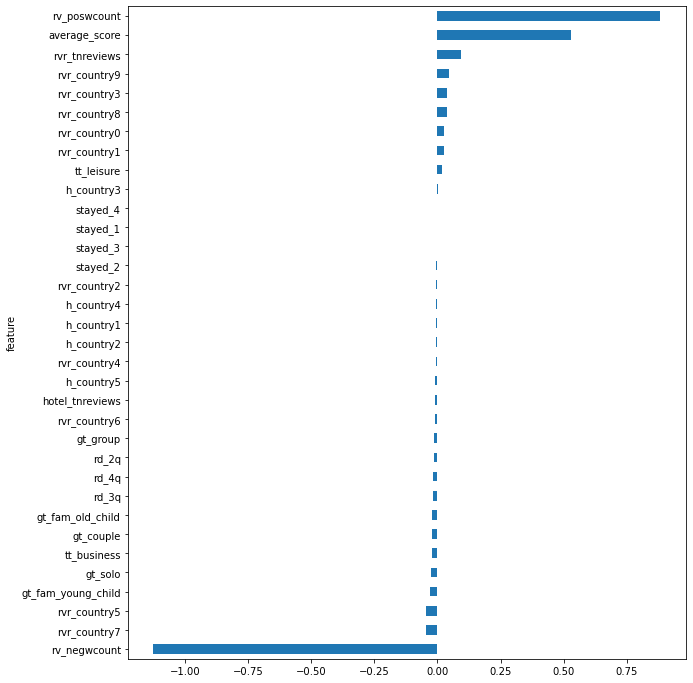

In [177]:
feat_importance['importance']\
    .sort_values()\
    .plot(kind='barh', figsize = (10, 12))

In [178]:
feat_importance['importance'].abs().sort_values(ascending = False)

feature
rv_negwcount          1.125789
rv_poswcount          0.883321
average_score         0.529810
rvr_tnreviews         0.092204
rvr_country9          0.045090
rvr_country7          0.044045
rvr_country5          0.043603
rvr_country3          0.036167
rvr_country8          0.036024
gt_fam_young_child    0.027544
rvr_country0          0.027310
rvr_country1          0.026418
gt_solo               0.024608
tt_business           0.022623
gt_couple             0.022551
gt_fam_old_child      0.020880
rd_3q                 0.019504
rd_4q                 0.017139
tt_leisure            0.016468
rd_2q                 0.013121
gt_group              0.012328
rvr_country6          0.010971
hotel_tnreviews       0.009612
h_country5            0.009074
rvr_country4          0.007537
h_country2            0.007344
h_country1            0.006867
h_country4            0.006266
rvr_country2          0.004125
stayed_2              0.003806
stayed_3              0.001076
h_country3            0.000645


Sembla que hi ha característiques amb molt poca importància.

A fi de veure si podem obtenir un model més senzill 
i mantenir unes mètriques semblants, 
provarem un model amb menys característiques.

Serà quelcom semblant a fer una anàlisis *PCA* o *SHAP* a mà.
Per a fer-ho ens quedarem només 
amb les que superin un determinat llindar:

In [219]:
# Definim un llindar, per davall el qual creim que hi ha renou

noisy_level = 2e-2

In [220]:
reduced_cols = \
    list(feat_importance[
        feat_importance['importance'].abs() >= noisy_level].index)

Aquest serà el nostre nou conjunt de característiques predictores:

In [222]:
reduced_cols

['rvr_country0',
 'rvr_country1',
 'rvr_country3',
 'rvr_country5',
 'rvr_country7',
 'rvr_country8',
 'rvr_country9',
 'gt_fam_old_child',
 'gt_fam_young_child',
 'gt_solo',
 'gt_couple',
 'tt_business',
 'average_score',
 'rv_negwcount',
 'rv_poswcount',
 'rvr_tnreviews']

In [216]:
linreg_model_redux = LinearRegression()

linreg_model_redux.fit(X_train_trans[reduced_cols], y_train_trans)

LinearRegression()

Vegem ara que tal prediu ...

In [217]:
y_test_hat_redux = linreg_model_redux.predict(X_test_trans[reduced_cols])

y_train_hat_redux = linreg_model_redux.predict(X_train_trans[reduced_cols])

In [218]:
# Miram mètriques 

from sklearn.metrics import r2_score, mean_squared_error

rmse_train_redux = RMSE(
    y_true = y_train_trans, 
    y_pred = y_train_hat_redux)

rmse_test_redux = RMSE(
    y_true = y_test_trans, 
    y_pred = y_test_hat_redux)

r2_train_redux = r2_score(
    y_true = y_train_trans, 
    y_pred = y_train_hat_redux)

r2_test_redux = r2_score(
    y_true = y_test_trans, 
    y_pred = y_test_hat_redux)

adj_r2_train_redux = adj_r2_score(
    model = linreg_model_redux,
    y_true = y_train_trans, 
    y_pred = y_train_hat_redux)

adj_r2_test_redux = adj_r2_score(
    model = linreg_model_redux,
    y_true = y_test_trans, 
    y_pred = y_test_hat_redux)

print(f"RMSE entrenament = {rmse_train_redux:.4f}"
      f", Dif. = {rmse_train_redux - rmse_train:.4f}")
print(f"RMSE prova       = {rmse_test_redux:.4f}"
      f", Dif. = {rmse_test_redux - rmse_test:.4f}")

print(f"R2 entrenament   = {r2_train_redux:.4f}"
      f", Dif. = {r2_train_redux - r2_train:.4f}")
print(f"R2 prova         = {r2_test_redux:.4f}"
      f", Dif. = {r2_test_redux - r2_test:.4f}")

print(f"R2 ajustat entr. = {adj_r2_train_redux:.4f}"
      f", Dif. = {adj_r2_train_redux - adj_r2_train:.4f}")
print(f"R2 ajustat prova = {adj_r2_test_redux:.4f}"
      f", Dif. = {adj_r2_test_redux - adj_r2_test:.4f}")

RMSE entrenament = 0.1805, Dif. = 0.0002
RMSE prova       = 0.1788, Dif. = 0.0001
R2 entrenament   = 0.3202, Dif. = -0.0017
R2 prova         = 0.3158, Dif. = -0.0009
R2 ajustat entr. = 0.3202, Dif. = -0.0016
R2 ajustat prova = 0.3157, Dif. = -0.0007


In [223]:
X_train_trans[reduced_cols]

,rvr_country0,rvr_country1,rvr_country3,rvr_country5,rvr_country7,rvr_country8,rvr_country9,gt_fam_old_child,gt_fam_young_child,gt_solo,gt_couple,tt_business,average_score,rv_negwcount,rv_poswcount,rvr_tnreviews
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.543478,0.973039,0.027848,0.018237
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.543478,0.000000,0.265823,0.018237
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.543478,0.102941,0.053165,0.024316
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.543478,0.514706,0.065823,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.543478,0.343137,0.020253,0.006079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.630435,0.034314,0.005063,0.021277
412021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.630435,0.026961,0.027848,0.033435
412022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.630435,0.046569,0.000000,0.006079
412023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.630435,0.000000,0.063291,0.006079


### 5. Entrena el modelo y revisa las variables/palabras que han sido más importantes.

Per tal de destriar quines són les paraules 
més importants de les valoracions, farem el següent:
- definirem una nota per damunt la qual considerarem bona l'opinió gravada i altrament, dolenta
- calcularem les freqüències de les paraules utilitzades a cada un dels dos grups
- també farem un nou model classificador per provar que tal funciona

In [229]:
# Definim la nota llindar

good_review = np.round(df['Reviewer_Score'].mean(), 1)

good_review

8.4

In [48]:
regressor_step = ('regressor', RandomForestRegressor())

model_regressor_steps = [data_prep_step, regressor_step]

pipe_model = Pipeline(model_regressor_steps)

In [ ]:
pipe_model.fit(X_train_trans, y_train_trans)

In [ ]:
from sklearn.model_selection import GridSearch


Seguim preparant per fer la nostra classificació ...

In [35]:
## Separam la variable dependent

X = df.drop(['Reviewer_Score'], axis = 1)

## Classificador: si la puntuació és més gran que goodScore, aleshores la consideram bona

minGoodScore = 8.4

y = df['Reviewer_Score'] >= minGoodScore

## A veure que tenim ...
y.value_counts()

True     293974
False    221764
Name: Reviewer_Score, dtype: int64

### 6. Cuéntale al cliente un mensaje clave ... 
... sobre que tipo de cosas tienen más en cuenta los clientes: `Si no quieres una mala review no sirvas comida fría`